<!-- https://odin.opendatawatch.com/Report/countryProfileUpdated/EST?year=2022 -->
<!-- Gjej te dhenat per Kosoven (vetem overall score) per kategorite dhe qite tabelen ne IEEE -->
| 2022  | Estonia | Kosovo |
| Social Statistics subscore |  	64| N/A |
| Economic Statistics subscore  	|89 | N/A |
| Environment subscore | 	87 | N/A |

In [ ]:
import pandas as pd

# Load the 2020 and 2022 ranking data
file_2020 = 'data/2020-ranking.csv'
file_2022 = 'data/2022-ranking.csv'

# Read the files to understand their structure
data_2015 = pd.read_csv('data/2015-ranking.csv')
data_2016 = pd.read_csv('data/2016-ranking.csv')
data_2017 = pd.read_csv('data/2017-ranking.csv')
data_2018 = pd.read_csv('data/2018-ranking.csv')
data_2020 = pd.read_csv(file_2020)
data_2022 = pd.read_csv(file_2022)

# Display first few rows of each to understand the structure and columns
data_2020.head(), data_2022.head()


(   Year  Rank Country code    Country Region Code              Region  \
 0  2020     1          SGP  Singapore         ASE  South-Eastern Asia   
 1  2020     2          POL     Poland         EUE      Eastern Europe   
 2  2020     3          FIN    Finland         EUN     Northern Europe   
 3  2020     4          DNK    Denmark         EUN     Northern Europe   
 4  2020     5          SWE     Sweden         EUN     Northern Europe   
 
    Overall  Coverage  Openness  
 0     92.0      80.4     100.0  
 1     85.3      81.2      88.8  
 2     84.8      82.1      87.1  
 3     84.4      74.4      93.0  
 4     83.9      77.6      89.3  ,
    Year  Rank Country code    Country Region Code              Region  \
 0  2022     1          SGP  Singapore         ASE  South-Eastern Asia   
 1  2022     2          POL     Poland         EUE      Eastern Europe   
 2  2022     3          DNK    Denmark         EUN     Northern Europe   
 3  2022     4          FIN    Finland         EUN   

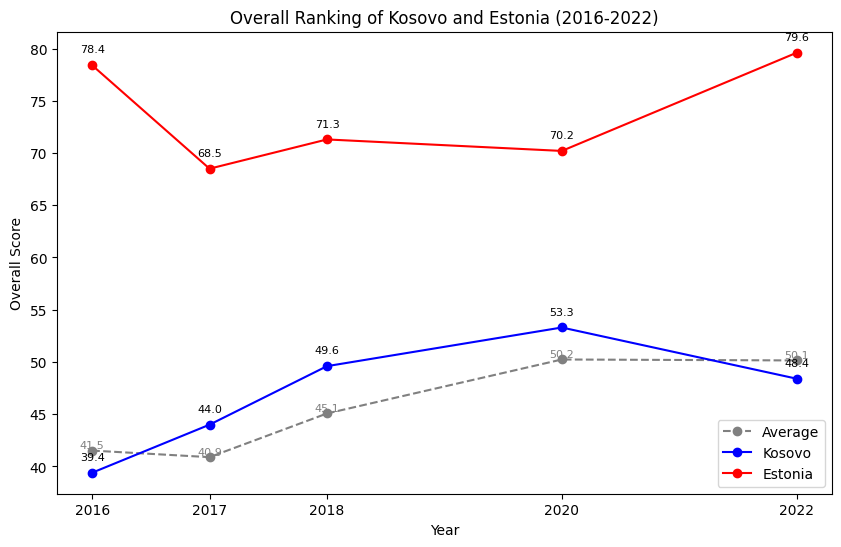

In [20]:
import matplotlib.pyplot as plt

# Concatenate all data for years of interest
all_data = pd.concat([data_2016, data_2017, data_2018, data_2020, data_2022])

# Filter for Kosovo and Estonia specifically and select relevant columns
data_combined = all_data[all_data["Country"].isin(["Kosovo", "Estonia"])][["Country", "Year", "Overall"]]

# Start plotting
plt.figure(figsize=(10, 6))

# Plot all countries in gray to provide context
# for country in all_data["Country"].unique():
#     country_data = all_data[all_data["Country"] == country][["Year", "Overall"]]
#     plt.plot(country_data["Year"], country_data["Overall"], color="gray", alpha=0.3)

# Calculate the mean "Overall" score for each year across all countries
mean_overall_by_year = all_data.groupby("Year")["Overall"].mean().reset_index()

# Plot the average line for all countries in gray with markers for each year
plt.plot(mean_overall_by_year["Year"], mean_overall_by_year["Overall"], color="gray", marker="o", linestyle="--", label="Average")

# Optionally, add labels to each average data point
for x, y in zip(mean_overall_by_year["Year"], mean_overall_by_year["Overall"]):
    plt.text(x, y, f'{y:.1f}', color="gray", ha="center", va="bottom", fontsize=8)

# Plot Kosovo in blue and Estonia in red with markers
kosovo_data = data_combined[data_combined["Country"] == "Kosovo"]
plt.plot(kosovo_data["Year"], kosovo_data["Overall"], color="blue", marker="o", label="Kosovo")

# Add text annotations for Kosovo
for x, y in zip(kosovo_data["Year"], kosovo_data["Overall"]):
    plt.text(x, y + 1, f'{y:.1f}', color="black", ha="center", va="bottom", fontsize=8)

estonia_data = data_combined[data_combined["Country"] == "Estonia"]
plt.plot(estonia_data["Year"], estonia_data["Overall"], color="red", marker="o", label="Estonia")

# Add text annotations for Estonia
for x, y in zip(estonia_data["Year"], estonia_data["Overall"]):
    plt.text(x, y + 1, f'{y:.1f}', color="black", ha="center", va="bottom", fontsize=8)

# Labeling and formatting
plt.xlabel("Year")
plt.ylabel("Overall Score")
plt.title("Overall Ranking of Kosovo and Estonia (2016-2022)")
plt.legend()
plt.grid(False)

# Adjust x-axis to show only integer years
plt.xticks(data_combined["Year"].unique())  # Set x-axis to unique years without decimals

plt.show()